In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
import zipfile 

pd.set_option("max_columns" , None)
# pd.set_option("max_rows" , 50)

## Question 1: Data Load and Data Structures

#### 1.1 : Programmatically download and load into your favorite analytical tool the transactions data. This data, which is in line-delimited JSON format, can be found [here](https://github.com/CapitalOneRecruiting/DS).

I am creating a `load_data` function which downloads the zipfile from the github location and unzip the data in the local machine. Further it will load the data as a Pandas dataframe.


In [4]:
def load_data(url : str):
    
    ## Extracting the file name 
    filename = URL.split('/')[-1]
    
    req = requests.get(url)
    
    ## Download the Zipfiles
    with open(filename , 'wb') as output_file:
        output_file.write(req.content)
        print('Downloading Completed')
        
    ## Unzip the file 
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall()
    data = pd.read_json('transactions.txt' , lines = True )
    
    print("Total number of rows in the dataset : {}".format(data.shape[0]))
    print("Total number of columns in the dataset : {}".format(data.shape[1]))
    
    return data

In [3]:
URL = "https://github.com/CapitalOneRecruiting/DS/raw/master/transactions.zip"
data = load_data(URL)

Total number of rows in the dataset : 786363
Total number of columns in the dataset : 29


#### 1.2 : Please describe the structure of the data. Number of records and fields in each record?

The dataset are following number of rows and columns in the dataset. 

```
- Rows : 786363
- Columns : 29

```

From the first glance, the dataset is a combination of `Numerical` ,  `Categorical`, `Boolean` and `DateTime` attributes. 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                786363 non-null  object 
 8   merchantCountryCode       786363 non-null  object 
 9   posEntryMode              786363 non-null  object 
 10  posConditionCode          786363 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

#### 1.3 : Please provide some additional basic summary statistics for each field. Be sure to include a count of null, minimum, maximum, and unique values where appropriate.

For the summary statistics, we might have to divide the work into following categories. 

1. **Null Values** : I initially didn't see any `NULL` values, but upon closer inspection, I discovered that the Null values are represented in the dataset as `''` values. Below is the total number of NULL values for different attributes and total percentage of missing data before and after replacement. There are attributes which has 100% missing data, hence I will be dropping these columns as they hold no analytical values. 

In [51]:
df_nullBefore = pd.DataFrame(data.isna().sum() , columns = ['Null Values Before Replacement'])
df_nullAfter  = pd.DataFrame(data.replace(to_replace= ''  , value = np.nan).isna().sum(), columns =  ['Null Values After Replacement'])
df_nullAfterPerc = df_nullAfter.applymap(lambda x: str(round(x*100/data.shape[0], 2)) + "%" )
df_nullAfterPerc.columns = ['% Null Values After Replacement']

pd.concat([df_nullBefore ,df_nullAfter , df_nullAfterPerc  ], axis = 1)

,Null Values Before Replacement,Null Values After Replacement,% Null Values After Replacement
accountNumber,0,0,0.0%
customerId,0,0,0.0%
creditLimit,0,0,0.0%
availableMoney,0,0,0.0%
transactionDateTime,0,0,0.0%
transactionAmount,0,0,0.0%
merchantName,0,0,0.0%
acqCountry,0,4562,0.58%
merchantCountryCode,0,724,0.09%
posEntryMode,0,4054,0.52%


2. **Unique Values of Categorical Variables** : 

<span style="color:cyan">As mentioned before, the dataset contains Categorical variables by default and there are certain other variable which have dtypes as `int` but should be considered as Categorical.</span> 

In [83]:
df_catg = data.astype({ 'accountNumber' : str
                        , 'customerId'    : str
                        , 'cardPresent'   : str
                        , 'expirationDateKeyInMatch' : str
                        , 'isFraud'       : str
                       , 'cardCVV' : str
                       , 'enteredCVV' : str
                       , 'cardLast4Digits' : str
                       , 'creditLimit' : str

                    }).select_dtypes('object')

df_nuniq = pd.DataFrame(df_catg.nunique(), columns= ['Num Of Unique Values'])
df_uniq = pd.DataFrame(pd.Series({c: df_catg[c].unique() for c in df_catg.columns}) , columns= ['Unique Values'])

pd.concat([df_nuniq , df_uniq] , axis = 1)

,Num Of Unique Values,Unique Values
accountNumber,5000,"[737265056, 830329091, 574788567, 924729945, 9..."
customerId,5000,"[737265056, 830329091, 574788567, 924729945, 9..."
creditLimit,10,"[5000, 2500, 50000, 15000, 10000, 250, 500, 10..."
transactionDateTime,776637,"[2016-08-13T14:27:32, 2016-10-11T05:05:54, 201..."
merchantName,2490,"[Uber, AMC #191138, Play Store, Tim Hortons #9..."
acqCountry,5,"[US, , CAN, MEX, PR]"
merchantCountryCode,5,"[US, CAN, , PR, MEX]"
posEntryMode,6,"[02, 09, 05, 80, 90, ]"
posConditionCode,4,"[01, 08, 99, ]"
merchantCategoryCode,19,"[rideshare, entertainment, mobileapps, fastfoo..."


2. **Summary of Numerical Attributes** : 

There are only 3 true numerical attributes which are: 

```
1. availableMoney : 
2. transactionAmount : 
3. currentBalance

```


In [99]:
df_num = data.astype({ 'accountNumber' : str
                        , 'customerId'    : str
                        , 'cardPresent'   : str
                        , 'expirationDateKeyInMatch' : str
                        , 'isFraud'       : str
                        , 'cardCVV' : str
                        , 'enteredCVV' : str
                        , 'cardLast4Digits' : str
                        , 'creditLimit' : str

                                }).select_dtypes(['int64' , 'float64'])

df_num.describe().apply(lambda x : round(x))

,availableMoney,transactionAmount,currentBalance
count,786363.0,786363.0,786363.0
mean,6251.0,137.0,4509.0
std,8881.0,148.0,6457.0
min,-1006.0,0.0,0.0
25%,1077.0,34.0,690.0
50%,3185.0,88.0,2452.0
75%,7500.0,191.0,5291.0
max,50000.0,2012.0,47499.0


In [98]:
# plt.figure(figsize=(12,8))
# g = sns.FacetGrid(data , col= 'isFraud' , height=5, aspect=2)
# g.map(sns.boxplot, "transactionAmount")
# plt.figure(figsize= (15,15))
# sns.pairplot(pd.concat([df_num , data[['isFraud']]] , axis = 1) , hue = 'isFraud')

<AxesSubplot:xlabel='transactionAmount', ylabel='Count'>

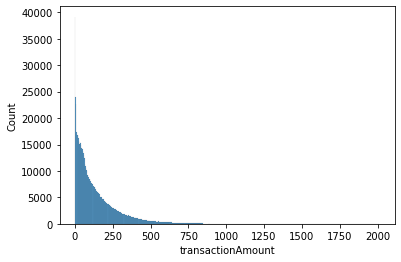

In [95]:
sns.histplot(data , x = 'transactionAmount' , )

In [80]:
df_num = None

data.select_dtypes(['int64' , ''])

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,,0.00,,,,False,,,False,False
1,737265056,737265056,5000,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.00,,,,True,,,False,False
2,737265056,737265056,5000,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.00,,,,False,,,False,False
3,737265056,737265056,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.00,,,,False,,,False,False
4,830329091,830329091,5000,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.00,,,,True,,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,01,rideshare,12/2022,2012-08-23,2012-08-23,936,936,3783,PURCHASE,,1095.04,,,,False,,,False,False
786359,732852505,732852505,50000,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,01,online_subscriptions,08/2023,2012-08-23,2012-08-23,939,939,3388,PURCHASE,,1214.96,,,,False,,,False,False
786360,732852505,732852505,50000,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,01,rideshare,08/2025,2012-08-23,2012-08-23,936,936,3783,PURCHASE,,1233.85,,,,False,,,False,False
786361,732852505,732852505,50000,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,99,online_retail,07/2022,2012-08-23,2012-08-23,939,939,3388,PURCHASE,,1283.28,,,,False,,,False,False


In [58]:
pd.DataFrame(data.select_dtypes('object').nunique() , columns= ['Unique Values'])

,Unique Values
transactionDateTime,776637
merchantName,2490
acqCountry,5
merchantCountryCode,5
posEntryMode,6
posConditionCode,4
merchantCategoryCode,19
currentExpDate,165
accountOpenDate,1820
dateOfLastAddressChange,2184


In [57]:
# data.replace(to_replace= '' , value = np.nan).isna().sum()x

In [4]:
URL = "https://github.com/CapitalOneRecruiting/DS/raw/master/transactions.zip"
data = load_data(URL)

Total number of rows in the dataset : 786363
Total number of columns in the dataset : 29


In [5]:
## Data Cleaning 

# - transactionDateTime
# - accountOpenDate
# - currentExpDate
# - dateOfLastAddressChange


df = data.astype({    'transactionDateTime'     : 'datetime64'
                    , 'accountOpenDate'         : 'datetime64'
                    , 'currentExpDate'          : 'datetime64'
                    , 'dateOfLastAddressChange' : 'datetime64'
                 })

### Question 2: Plot
- Plot a histogram of the processed amounts of each transaction, the transactionAmount column.

- Report any structure you find and any hypotheses you have about that structure.



<AxesSubplot:xlabel='transactionAmount', ylabel='Count'>

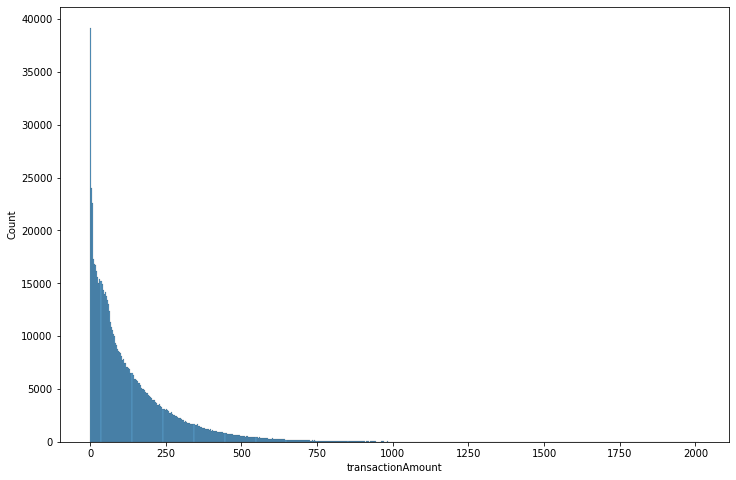

In [6]:
# data['transactionAmount'].hist()
plt.figure(figsize= (12, 8))
sns.histplot( data = data  , x = 'transactionAmount')

In [7]:
print("The mean of the Transaction Amount : {}".format(data.transactionAmount.mean()))
print("The median of the Transaction Amount : {}".format(data.transactionAmount.median()))
print("The mode of the Transaction Amount : {}".format(data.transactionAmount.mode()[0]))
print("The std of the Transaction Amount : {}".format(data.transactionAmount.std()))
print("The skewness of the Transaction Amount : {}".format(data.transactionAmount.skew()))

The mean of the Transaction Amount : 136.98579095150708
The median of the Transaction Amount : 87.9
The mode of the Transaction Amount : 0.0
The std of the Transaction Amount : 147.72556901952117
The skewness of the Transaction Amount : 2.092246264815964


### Question 3: Data Wrangling - Duplicate Transactions
You will notice a number of what look like duplicated transactions in the data set. One type of duplicated transaction is a reversed transaction, where a purchase is followed by a reversal. Another example is a multi-swipe, where a vendor accidentally charges a customer's card multiple times within a short time span.

- Can you programmatically identify reversed and multi-swipe transactions?

- What total number of transactions and total dollar amount do you estimate for the reversed transactions? For the multi-swipe transactions? (please consider the first transaction to be "normal" and exclude it from the number of transaction and dollar amount counts)

- Did you find anything interesting about either kind of transaction?



#### Reversed Transactions 

There are around 20K reversed transactions in the dataset. These are identified by joining the reversed transactions with the actual transactions and making sure the time delta between these two timestamps are positive

In [244]:
def split_data(df , column_name : str , category : str):
    if [category] in  df[column_name].unique():
        dff = df[df[column_name] == category]
        return dff
    else:
        print("The {} is not present in the {} attribute.".format(column_name , category))

def reversal_payment(df):
    df_reversal = split_data(df , column_name = 'transactionType' , category = 'REVERSAL')
    df_purchase = split_data(df , column_name = 'transactionType' , category = 'PURCHASE')
    df_reversed = df_reversal.merge(df_purchase 
                                      , how = 'left' 
                                      , left_on = ['accountNumber' ,  'merchantName' , 'merchantCountryCode', 'transactionAmount' ]
                                      , right_on = ['accountNumber' , 'merchantName' , 'merchantCountryCode', 'transactionAmount']
                                      , suffixes=('_reverse', '_purchase')
                                  )
    df_reversed['Time_diff'] = df_reversed['transactionDateTime_reverse'] - df_reversed['transactionDateTime_purchase']
    df_reversed['Time_diff'] = df_reversed.Time_diff.astype('timedelta64[m]')
    df_reversed = df_reversed[df_reversed['Time_diff'] >= 0]
    df_reversed = df_reversed[df_reversed['transactionAmount'] > 0 ]
    df_reversed = df_reversed[['accountNumber' ,  'merchantName' , 'merchantCountryCode', 'transactionAmount' , 'transactionDateTime_reverse' ]]
    print("Shape of the reversed data : {}".format(df_reversed.shape))
          
          
    return df_reversed


def multi_swipe_payment(df , threshold : int):
    df_purchase = split_data(df , column_name = 'transactionType' , category = 'PURCHASE')
    df_multi_swipe = df_purchase.groupby( ['accountNumber' ,  'merchantName' , 'merchantCountryCode', 'transactionAmount' ])[['transactionDateTime']].count().reset_index()
    df_multi_swipe = df_multi_swipe.rename(columns={'transactionDateTime' : 'transactionCount'})
    df_multi_swipe = df_multi_swipe[df_multi_swipe['transactionCount'] > 1]
    df_multi_swipe = df_multi_swipe.sort_values(['transactionCount'] , ascending= False)
    df_multi_swipe = df_multi_swipe.merge(df_purchase 
                                      , how = 'left' 
                                      , left_on = ['accountNumber' ,  'merchantName' , 'merchantCountryCode', 'transactionAmount' ]
                                      , right_on = ['accountNumber' , 'merchantName' , 'merchantCountryCode', 'transactionAmount']
                                      , suffixes=('_x', '_y'),
                                    )

    df_multi_swipe =  df_multi_swipe.sort_values(['accountNumber' , 'merchantName' , 'merchantCountryCode', 'transactionAmount' , 'transactionDateTime'] , ascending= True)
    df_multi_swipe['nextTransactionTime'] = df_multi_swipe.groupby(['accountNumber' ,  'merchantName' , 'merchantCountryCode', 'transactionAmount' ])[['transactionDateTime']].shift(-1)
    df_multi_swipe['timeDelta'] = df_multi_swipe['nextTransactionTime'] -  df_multi_swipe['transactionDateTime'] 
    df_multi_swipe['timeDelta'] = df_multi_swipe['timeDelta'].astype('timedelta64[s]')
    df_multi_swipe = df_multi_swipe[~df_multi_swipe.isna()].reset_index(drop = True)
    df_multi_swipe = df_multi_swipe[(df_multi_swipe.timeDelta <= threshold)]
    df_multi_swipe = df_multi_swipe[['accountNumber' ,  'merchantName' , 'merchantCountryCode', 'transactionAmount' , 'transactionDateTime' ]]
    print("Shape of the Multi swipe data : {}".format(df_multi_swipe.shape))
    
    return df_multi_swipe

In [245]:
df_reversed = reversal_payment(df)


## Selecting thresholds of 3 mins for the multi-
df_multi_swipe = multi_swipe_payment(df , threshold = 180)

Shape of the reversed data : (17997, 5)
Shape of the Multi swipe data : (7449, 32)


In [254]:
# sns.boxplot(data = df_multi_swipe , x = 'transactionAmount' , hue = 'isFraud')

In [255]:
# sns.barplot(data = df_multi_swipe , x = 'transactionAmount' , hue = 'isFraud')

In [256]:
# sns.barplot?

In [43]:
# %%time
# ## How many transactions have close to the time. 
# ## 830329091
# ## 894797151

# ## First let's find all the reversal and actual purchases payments. 
# df_reversal = df[df.transactionType == 'REVERSAL']
# df_reversal = df_reversal[['accountNumber' ,  'merchantName' , 'merchantCountryCode', 'transactionAmount' ,  'transactionDateTime']]
# df_purchase = df[df.transactionType == 'PURCHASE']
# df_purchase = df_purchase[['accountNumber' ,  'merchantName' , 'merchantCountryCode', 'transactionAmount' ,  'transactionDateTime']]

# ## total 20k (20303, 29) transactions which are reveresed , let's try to join it with the original transactions
# df_reversed = df_reversal.merge(df_purchase 
#                                   , how = 'left' 
#                                   , left_on = ['accountNumber' ,  'merchantName' , 'merchantCountryCode', 'transactionAmount' ]
#                                   , right_on = ['accountNumber' , 'merchantName' , 'merchantCountryCode', 'transactionAmount']
#                                   , suffixes=('_reverse', '_purchase'),
#                               )
# print("Shape of the reversed data : {}".format(df_reversed.shape))

# df_reversed['Time_diff'] = df_reversed['transactionDateTime_reverse'] - df_reversed['transactionDateTime_purchase']
# df_reversed['Time_diff'] = df_reversed.Time_diff.astype('timedelta64[m]')



# df_reversed = df_reversed[df_revered['Time_diff'] >= 0]
# print("Shape of the reversed data : {}".format(df_reversed.shape))


# df_reversed = df_reversed[df_reversed['transactionAmount'] > 0 ]
# print("Shape of the reversed data : {}".format(df_reversed.shape))

# ## 20669,55

Shape of the reversed data : (20666, 6)
Shape of the reversed data : (17999, 7)
Shape of the reversed data : (17997, 7)
CPU times: user 1.3 s, sys: 125 ms, total: 1.43 s
Wall time: 1.61 s


#### Multi-Swipe Transaction 

How will we tackel this? This is little challenging as there is not indicator or `REVERSAL` payment, hence a time factor will be very much important. 
1. First we will take all the `PURCHASE` transactions type. 
2. For each accounts we will look for number of occurance of same transactions ( amount , merchant and Merchant Country code)
3. Then we will see the ideal time difference between the transactions. 

In [233]:
df_multi_swipe = df_purchase.groupby( ['accountNumber' ,  'merchantName' , 'merchantCountryCode', 'transactionAmount' ]).count().reset_index()
df_multi_swipe = df_multi_swipe.rename(columns={'transactionDateTime' : 'transactionCount'})
df_multi_swipe = df_multi_swipe[df_multi_swipe['transactionCount'] > 1]
df_multi_swipe = df_multi_swipe.sort_values(['transactionCount'] , ascending= False)


df_multi_swipe = df_multi_swipe.merge(df_purchase 
                                      , how = 'left' 
                                      , left_on = ['accountNumber' ,  'merchantName' , 'merchantCountryCode', 'transactionAmount' ]
                                      , right_on = ['accountNumber' , 'merchantName' , 'merchantCountryCode', 'transactionAmount']
                                      , suffixes=('_reverse', '_purchase'),
                                    )

# df_multi_swipe =  df_multi_swipe.sort_values(['accountNumber' , 'merchantName' , 'merchantCountryCode', 'transactionAmount' , 'transactionDateTime'] , ascending= True)
# df_multi_swipe['nextTransactionTime'] = df_multi_swipe.groupby(['accountNumber' ,  'merchantName' , 'merchantCountryCode', 'transactionAmount' ])[['transactionDateTime']].shift(-1)
# df_multi_swipe['timeDelta'] = df_multi_swipe['nextTransactionTime'] -  df_multi_swipe['transactionDateTime'] 
# df_multi_swipe['timeDelta'] = df_multi_swipe['timeDelta'].astype('timedelta64[s]')
# df_multi_swipe = df_multi_swipe[~df_multi_swipe.isna()].reset_index(drop = True)
# df_multi_swipe[(df_multi_swipe.timeDelta <= 180)]

df_multi_swipe

,accountNumber,merchantName,merchantCountryCode,transactionAmount,transactionCount,transactionDateTime
0,894797151,GreenCook,US,48.90,53,2016-01-01 18:17:54
1,894797151,GreenCook,US,48.90,53,2016-01-08 04:13:54
2,894797151,GreenCook,US,48.90,53,2016-01-14 15:39:14
3,894797151,GreenCook,US,48.90,53,2016-01-21 20:13:10
4,894797151,GreenCook,US,48.90,53,2016-01-29 09:19:53
...,...,...,...,...,...,...
65697,468155756,Shell Tire,US,400.26,2,2016-03-29 07:41:02
65698,468155756,Uber,US,88.53,2,2016-05-06 23:50:48
65699,468155756,Uber,US,88.53,2,2016-07-08 14:36:06
65700,457701440,target.com,US,72.08,2,2016-08-22 10:21:14


<AxesSubplot:xlabel='timeDelta', ylabel='Count'>

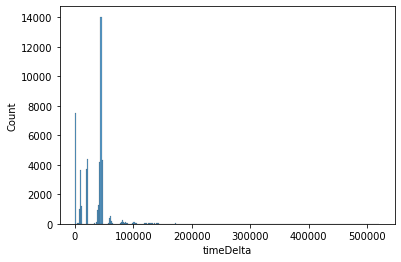

In [149]:
sns.histplot( data = df_multi_swipe ,  x= 'timeDelta')

<AxesSubplot:xlabel='timeDelta'>

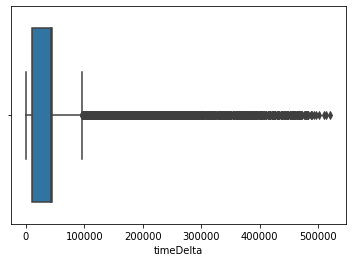

In [150]:
sns.boxplot( data = df_multi_swipe ,  x= 'timeDelta')

In [151]:
df_multi_swipe.timeDelta.describe()

count     50768.000000
mean      37666.278916
std       45115.434052
min           0.000000
25%       11202.750000
50%       43330.000000
75%       44968.000000
max      520609.000000
Name: timeDelta, dtype: float64

There are transactions which has reversal payments and at the same time had multiple transactions. Things that we should not bother is 0 transaction amount, however there are some non-zero transactions which I am interested. 

Account Numbers 
- 380680241 : Fresh eCards : 63.09
- 380680241 : Blue Mountain eCards : 241.70
- 570884863 : AMC #128743	: 1.78

In [60]:
df_380680241 = data[data['accountNumber'] == 380680241]
df_570884863 = data[data['accountNumber'] == 570884863]

### Question 4: Model
Fraud is a problem for any bank. Fraud can take many forms, whether it is someone stealing a single credit card, to large batches of stolen credit card numbers being used on the web, or even a mass compromise of credit card numbers stolen from a merchant via tools like credit card skimming devices.

- Each of the transactions in the dataset has a field called isFraud. Please build a predictive model to determine whether a given transaction will be fraudulent or not. Use as much of the data as you like (or all of it).

- Provide an estimate of performance using an appropriate sample, and show your work.

- Please explain your methodology (modeling algorithm/method used and why, what features/data you found useful, what questions you have, and what you would do next with more time)

In [209]:
split_data(df , column_name= 'transactionType' , category = 'REVERSAL')

The category name was found in the column:


In [205]:
# df[df.transactionType == 'REVERSAL']


['REVERSAL'] in df['transactionType']

True

In [211]:
l = split_data(df , column_name= 'transactionType' , category= 'KEEP')

The transactionType is not present in the KEEP attribute.
